#### Preparación para correr el código

In [1]:
import cv2;
import numpy as np;
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from IPython.display import display

import sys

print("Python version %s / OpenCV version %s " %(sys.version,cv2.__version__))

Python version 3.11.8 (main, Feb 12 2024, 14:50:05) [GCC 13.2.1 20230801] / OpenCV version 4.9.0 


In [2]:
drive_path = ".."

#### Ejercicio 4
2. texto


##### 1

In [38]:
%matplotlib inline
path_imagenes = [
  "/images/mariposa02.png",
  "/images/flores02.jpg",
  "/images/lapices02.jpg"
]

def process_image(path, kernel_size=5, bilateral_param=150,show=True):
  img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

  kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
  kernel /= (kernel_size**2)

  img_suavizado = cv2.filter2D(img,-1, kernel)
  img_bilateral = cv2.bilateralFilter(img,9,bilateral_param,bilateral_param)

  if show:
    fig,ax= plt.subplots(1,3)
    fig.set_size_inches(18.5, 10.5)
    ax[0].imshow(img,cmap='gray')
    ax[1].imshow(img_suavizado,cmap='gray')
    ax[2].imshow(img_bilateral,cmap='gray')
    plt.plot()
  
  return np.array([img_suavizado,img_bilateral])

def perfil_grises(img,i,dim=0):
    if dim == 0:
        print(img.shape)
        return img[i,:]
    return img[:,i]

def plot_perfil_grises(perfiles):
    fig,ax= plt.subplots(1,3)
    fig.set_size_inches(18.5, 10.5)
    ax[0].plot(perfiles[0])
    ax[1].plot(perfiles[1])
    ax[2].plot(perfiles[2])
    plt.plot()

def plot_perfil_grises_superpuestos(perfiles):
    fig,ax= plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(perfiles[0])
    ax.plot(perfiles[1])
    ax.plot(perfiles[2])
    ax.legend(["Original","Filtro Pasa-Bajos", "Filtro Bilateral"])
    plt.plot()

def plot_perfil_sin_original(perfiles):
    fig,ax= plt.subplots()
    fig.set_size_inches(18.5, 10.5)
    ax.plot(perfiles[0])
    ax.plot(perfiles[1])
    ax.legend(["Filtro Pasa-Bajos", "Filtro Bilateral"])
    plt.plot()


(601, 799)
(601, 799)
(601, 799)


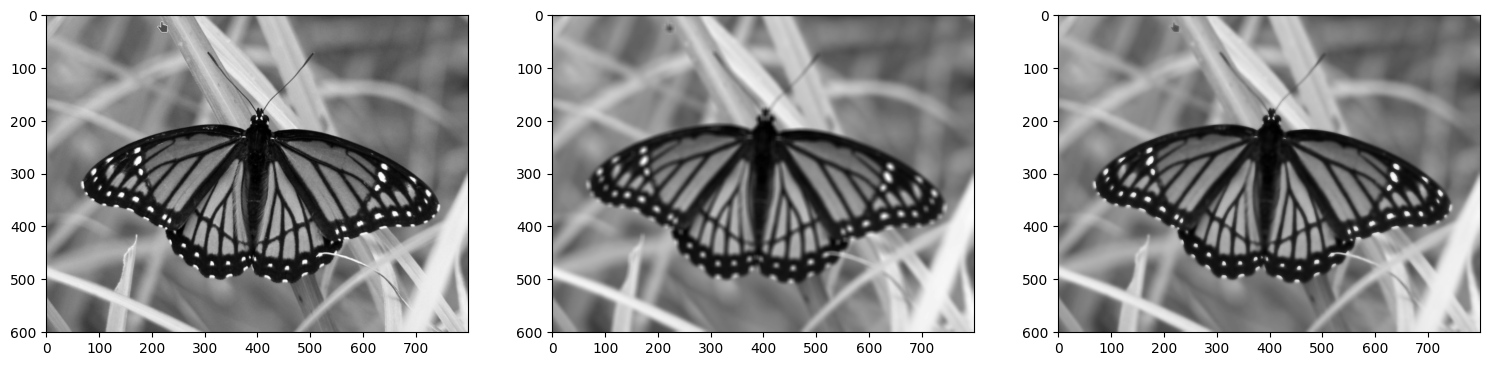

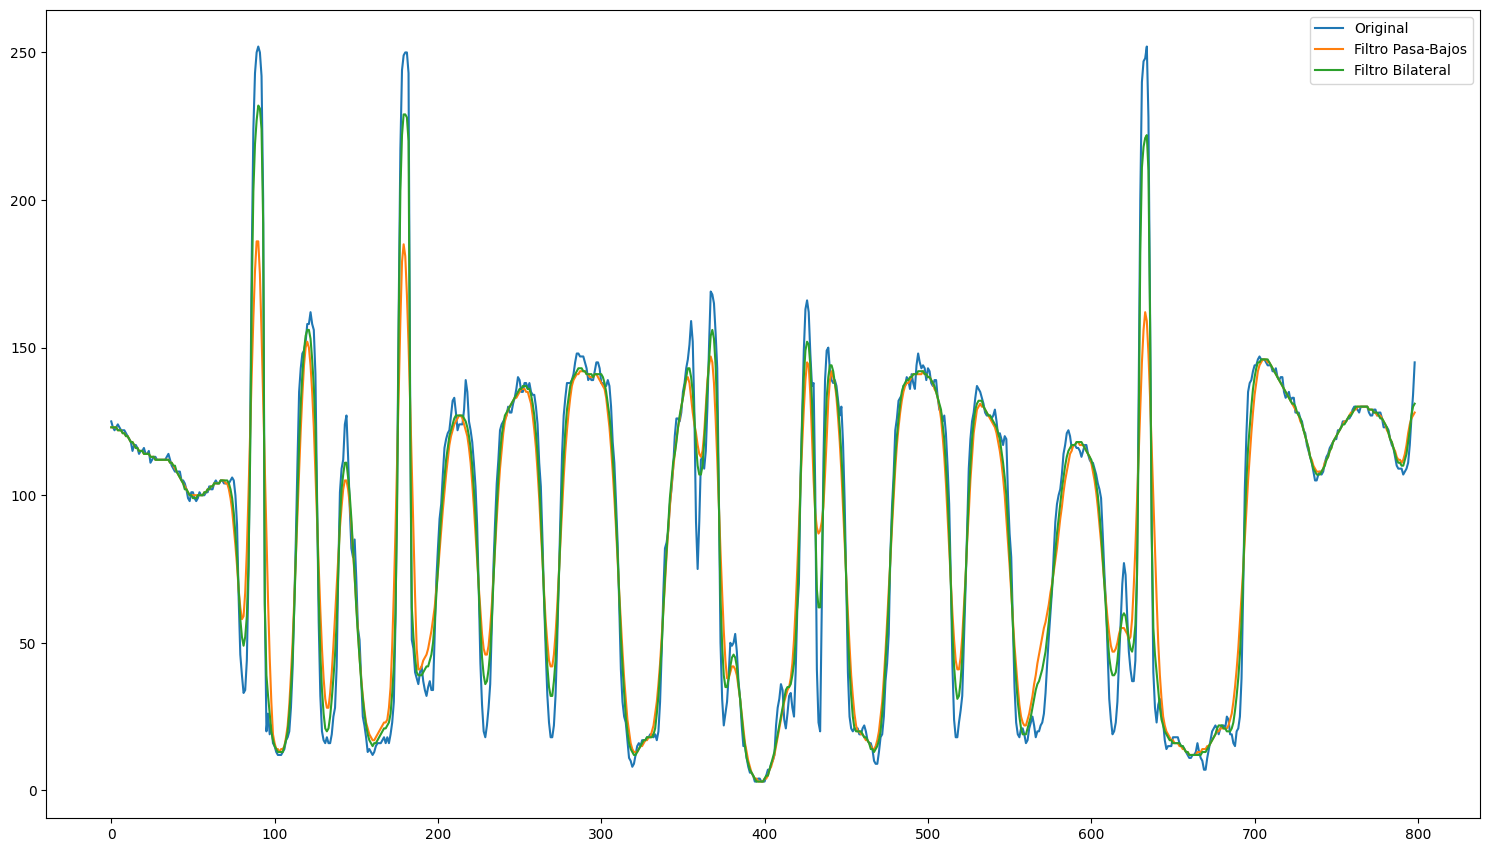

In [40]:
mariposa= cv2.imread(drive_path+path_imagenes[0],cv2.IMREAD_GRAYSCALE)
mariposa_procesada = process_image(drive_path+path_imagenes[0],kernel_size=9,bilateral_param=100)
fix_line_mariposa = 300

perfil_mariposa = perfil_grises(mariposa,fix_line_mariposa,0)
perfil_mariposa_suav = perfil_grises(mariposa_procesada[0],fix_line_mariposa,0)
perfil_mariposa_bil = perfil_grises(mariposa_procesada[1],fix_line_mariposa,0)
perfiles_mariposa = [perfil_mariposa, perfil_mariposa_suav, perfil_mariposa_bil]

# plot_perfil_grises(perfiles_mariposa)
plot_perfil_grises_superpuestos(perfiles_mariposa)

(533, 800)
(533, 800)
(533, 800)


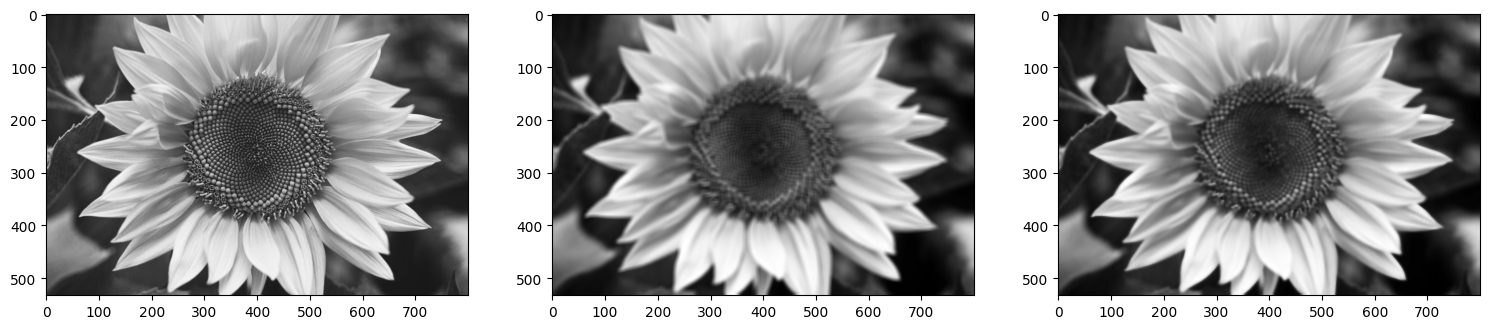

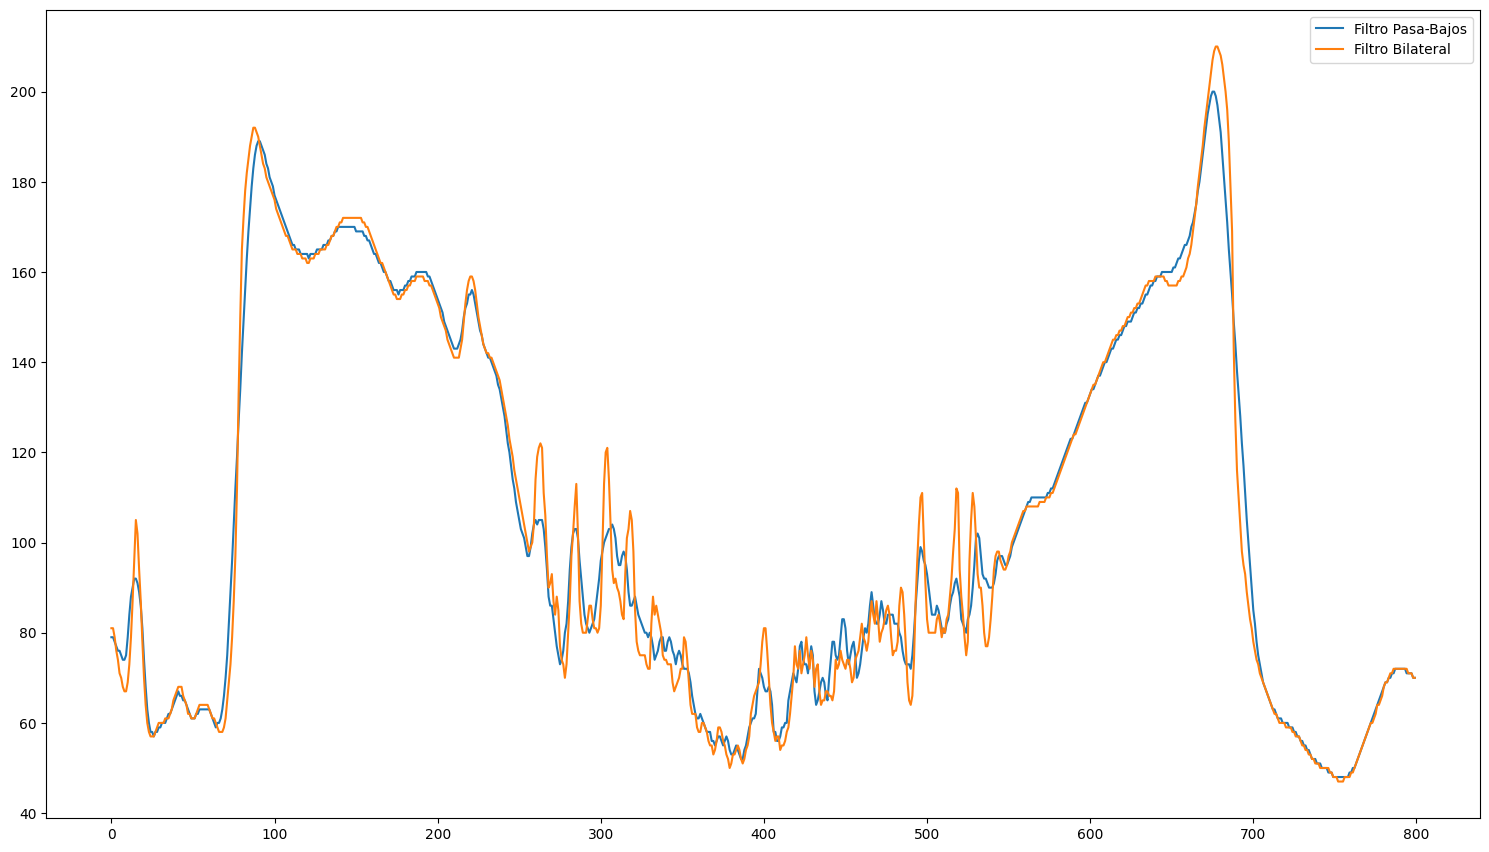

In [36]:

flores= cv2.imread(drive_path+path_imagenes[1],cv2.IMREAD_GRAYSCALE)
flores_procesada = process_image(drive_path+path_imagenes[1],kernel_size=9,bilateral_param=100)
fix_line_flores = 250

perfil_flores = perfil_grises(flores,fix_line_flores,0)
perfil_flores_suav = perfil_grises(flores_procesada[0],fix_line_flores,0)
perfil_flores_bil = perfil_grises(flores_procesada[1],fix_line_flores,0)
perfiles_flores = [perfil_flores, perfil_flores_suav,perfil_flores_bil]

# plot_perfil_grises(perfiles_flores)
# plot_perfil_grises_superpuestos(perfiles_flores)
plot_perfil_sin_original([perfil_flores_suav,perfil_flores_bil])


(762, 1024)
(762, 1024)
(762, 1024)


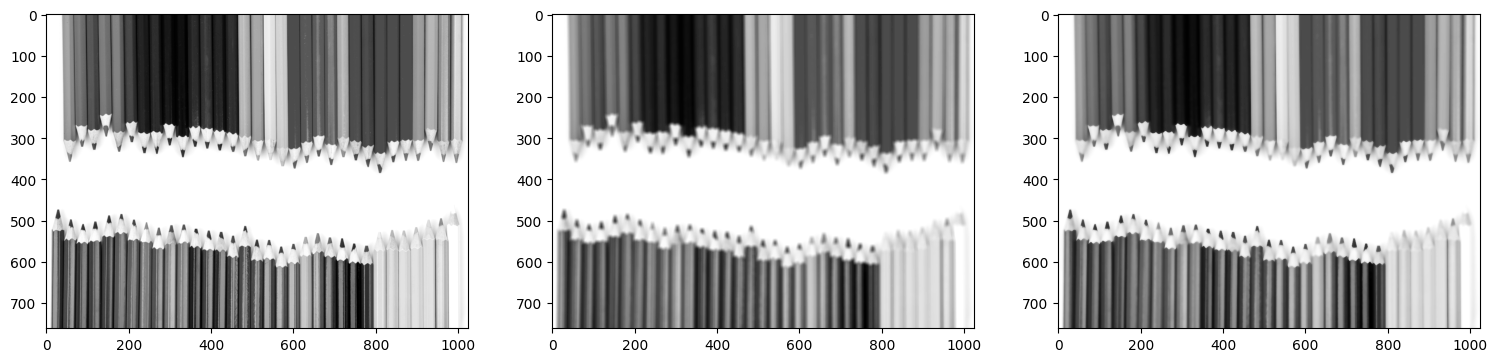

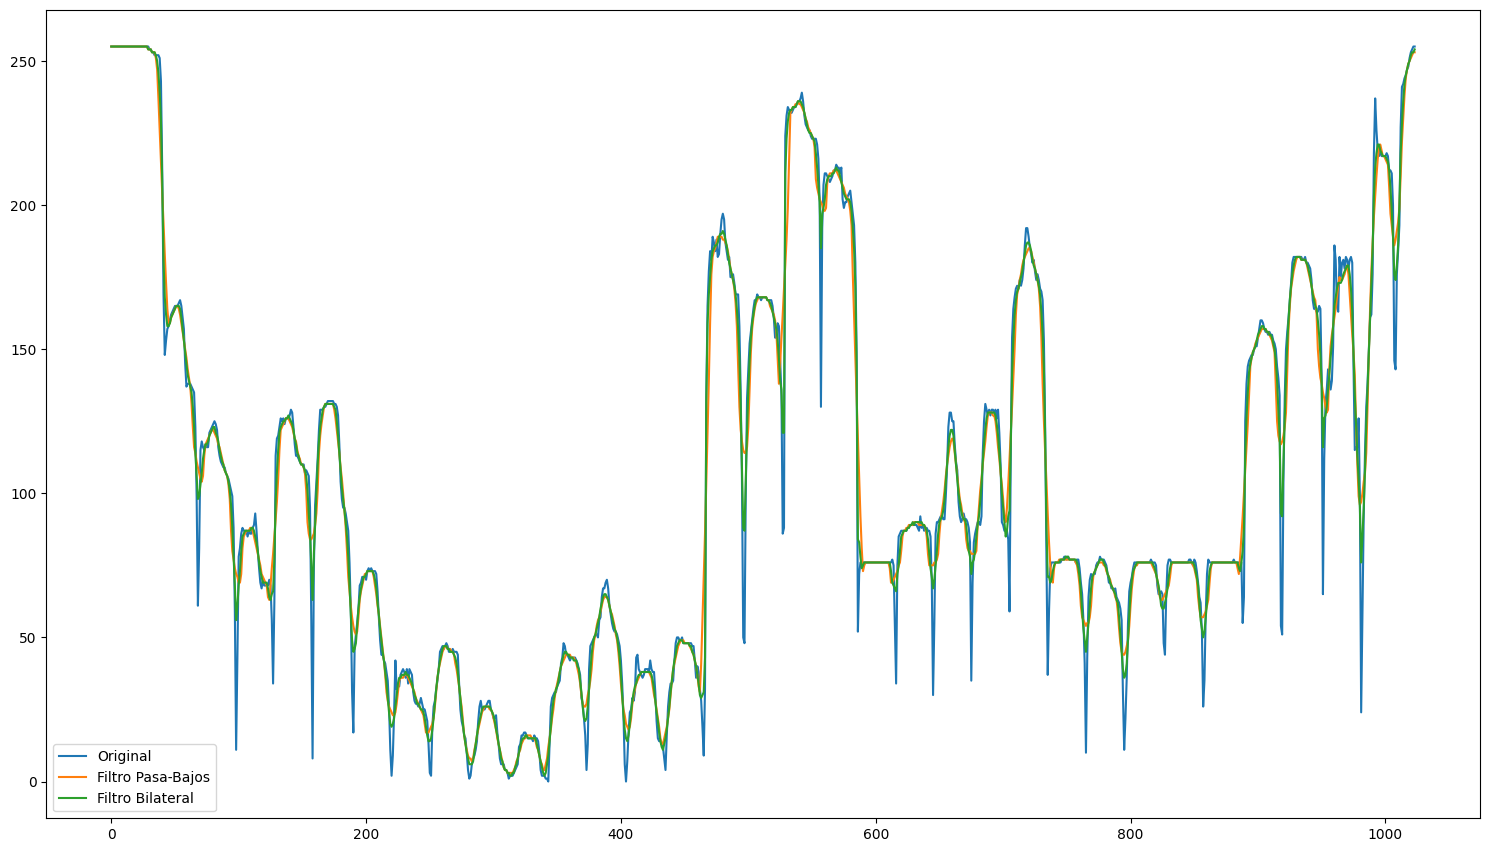

In [41]:
lapices= cv2.imread(drive_path+path_imagenes[2],cv2.IMREAD_GRAYSCALE)
lapices_procesada = process_image(drive_path+path_imagenes[2],kernel_size=9,bilateral_param=75)

fix_line_lapices = 100

perfil_lapices = perfil_grises(lapices,fix_line_lapices,0)
perfil_lapices_suav = perfil_grises(lapices_procesada[0],fix_line_lapices,0)
perfil_lapices_bil = perfil_grises(lapices_procesada[1],fix_line_lapices,0)
perfiles_lapices = [perfil_lapices, perfil_lapices_suav,perfil_lapices_bil]

plot_perfil_grises_superpuestos(perfiles_lapices)
# plot_perfil_grises(perfiles_lapices)

#### Ya basta frizaaa

Dropdown(description='Number:', options=(('Original', 0), ('Filtro Pasa-Bajos', 1), ('Filtro Bilateral', 2)), …

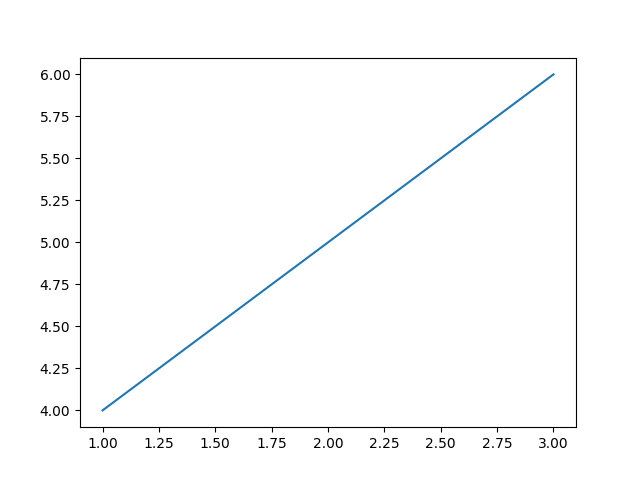

No such comm: a28bf7962b2e44c2a20fce4cd8c968ab


In [15]:
%matplotlib widget
import matplotlib.pyplot as plt
import ipywidgets as widgets

w = widgets.Dropdown(
    options=[('Original',0), ('Filtro Pasa-Bajos',1), ('Filtro Bilateral',2)],
    value=0,
    description='Number:',
    disabled=False,
)
display(w)

def onclick(event):
    plt.scatter(event.xdata, event.ydata, color='red')
    plt.draw()

fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 5, 6])  # Example plot

# Connect the 'button_press_event' event to the onclick function
cid = fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'sharex'

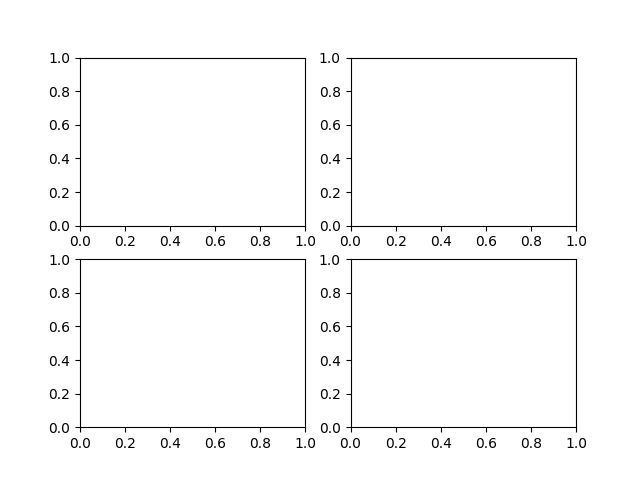

In [16]:
import ipywidgets as widgets

plt.close('all')

# mariposa = cv2.imread(drive_path+path_imagenes[0],cv2.IMREAD_GRAYSCALE)
# flores = cv2.imread(drive_path+path_imagenes[1],cv2.IMREAD_GRAYSCALE)
# lapices = cv2.imread(drive_path+path_imagenes[2],cv2.IMREAD_GRAYSCALE)

# imagenes = [mariposa,flores,lapices]
imagenes = [cv2.imread(drive_path+path_imagenes[i],cv2.IMREAD_GRAYSCALE) for i in range(3)]
selected_image = imagenes[0]
fig_img,ax_img = plt.subplots(2,2)
# ax_img[0].sharex(ax_img[1])
fig_img.set_size_inches(10, 6)

def select_image(index):
    return imagenes[index]

# def select_filter(index):
#     if index == 1:
#         kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
#         kernel /= (kernel_size**2)
#         img_suavizado = cv2.filter2D(img,-1, kernel)
#     return imagenes[index]

def change_image(imagen=0):
    global selected_image
    selected_image = select_image(imagen)
    ax_img[0].cla()
    ax_img[0].imshow(selected_image,cmap='gray')

def apply_filter(filtro,kernel_size=5,bilateral_param=75):
    global selected_image
    selected_filtrada = selected_image
    if filtro == 1:
        kernel = np.ones((kernel_size, kernel_size), dtype=np.float32)
        kernel /= (kernel_size**2)
        selected_filtrada = cv2.filter2D(selected_image,-1, kernel)
    if filtro == 2:
        selected_filtrada = cv2.bilateralFilter(selected_image,9,bilateral_param,bilateral_param)

    ax_img[2].cla()
    ax_img[2].imshow(selected_filtrada,cmap='gray')

def change_kernel(kernel_size):
    global selected_image

selector_imagen = widgets.interactive(change_image,imagen=[('Mariposa',0), ('Flores',1), ('Lápices',2)])
selector_filtro = widgets.interactive(
    apply_filter,
    filtro=[('Filtro Pasa-Bajos',1), ('Filtro Bilateral',2)],cambio=widgets.fixed(False),
    kernel_size=widgets.IntSlider(min=1, max=40,step=1,value=5),
    bilateral_param=widgets.IntSlider(min=1, max=200,step=1,value=75))

display(selector_imagen,selector_filtro)